# Nueral Network Classification with PyTorch


# Binary Classification Problem


# 1. Creating a toy dataset


In [370]:
import sklearn
from sklearn.datasets import make_circles

# Creating a toy dataset

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) # adding flavour to the randomness

len(X), len(y)

(1000, 1000)

In [371]:
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000, 2))

In [372]:
y, y.shape # Binary

(array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

In [373]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [374]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"x-axis": X[:, 0],
                        "y-axis": X[:, 1],
                        "binary": y})

circles.head(10)

,x-axis,y-axis,binary
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


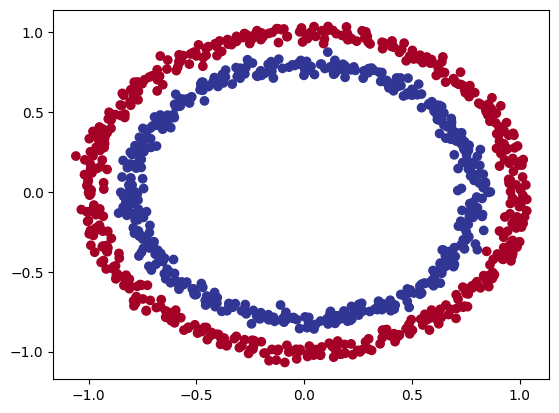

In [375]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
# In our case 1 is blue 0 is red

### Check input and output shape


In [376]:
X.shape, y.shape

((1000, 2), (1000,))

In [377]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample}\n")
print(f"Shape for one sample of X: {X_sample.shape}\n")
print(f"Value for one sample of y: {y_sample}\n")
print(f"Shape for one sample of y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074]

Shape for one sample of X: (2,)

Value for one sample of y: 1

Shape for one sample of y: ()


In [378]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [379]:
# Turn data into tensors
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [380]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [381]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 2. Building a model


In [382]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [383]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_0 = nn.Linear(in_features=2, out_features=5)
        self.layer_1 = nn.Linear(in_features=5, out_features=1)

    # Define a forward method that outlines the forward pass
    def forward(self, x):
        return self.layer_1(self.layer_0(x)) # x -> layer_0 -> layer_1 -> output

# Instantiate and instance of our model class and send it to the target device
model_1 = CircleModelV0().to(device)
model_1, device

(CircleModelV0(
   (layer_0): Linear(in_features=2, out_features=5, bias=True)
   (layer_1): Linear(in_features=5, out_features=1, bias=True)
 ),
 'cuda')

In [384]:
# check model parameters device
next(model_1.parameters()).device

device(type='cuda', index=0)

In [385]:
# Replicate the model using nn.sequential()
# Steps the code through the layers in sequence

model_1_R = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=2, out_features=5)
).to(device)

model_1_R

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=2, out_features=5, bias=True)
)

In [386]:
model_1.state_dict()

OrderedDict([('layer_0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_1.bias', tensor([-0.2060], device='cuda:0'))])

In [387]:
# Setup the loss function

# loss_function = nn.BCELoss() - Requires input to have gone through the sigmoid activation function

loss_fn = nn.BCEWithLogitsLoss()# has sigmoid activation funtion built in

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [388]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# 3. Train model


In [389]:
# view first 5 raw logits (raw outputs of our model)
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test.to(device))

y_logits[:5]

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')

In [390]:
# convert these raw logits into prediction probabilities using activation functions
# sigmoid for binary and softmax for multiclasses
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')

In [391]:
# round them up to 1 or down to 0 for binary
y_pred_labels = torch.round(y_pred_probs)

# Get rid of extra dimension
y_pred_labels.squeeze()


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

### Building a training and test loop


In [392]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### training
    model_1.train()

    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # Calculate loss and accuracy
    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Back propagation
    loss.backward()

    # Optimizer step (Gradient Descent)
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss and accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Primt out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69569, Acc: 50.00% | Test loss: 0.69721, Test acc: 50.00%
Epoch: 100 | Loss: 0.69302, Acc: 50.50% | Test loss: 0.69542, Test acc: 46.50%
Epoch: 200 | Loss: 0.69299, Acc: 51.50% | Test loss: 0.69503, Test acc: 46.50%


Epoch: 300 | Loss: 0.69298, Acc: 51.25% | Test loss: 0.69485, Test acc: 45.50%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69476, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Acc: 51.38% | Test loss: 0.69472, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69470, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69469, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69468, Test acc: 46.00%


In [393]:
# Make some predictions and visualize
# Our model isn't working correctly

import requests
from pathlib import Path

# Download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_function.py already exists, skipping dowloading")
else:
    print("Downloading helper_function.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f: # open a file and set context to write binary as file
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_function.py already exists, skipping dowloading


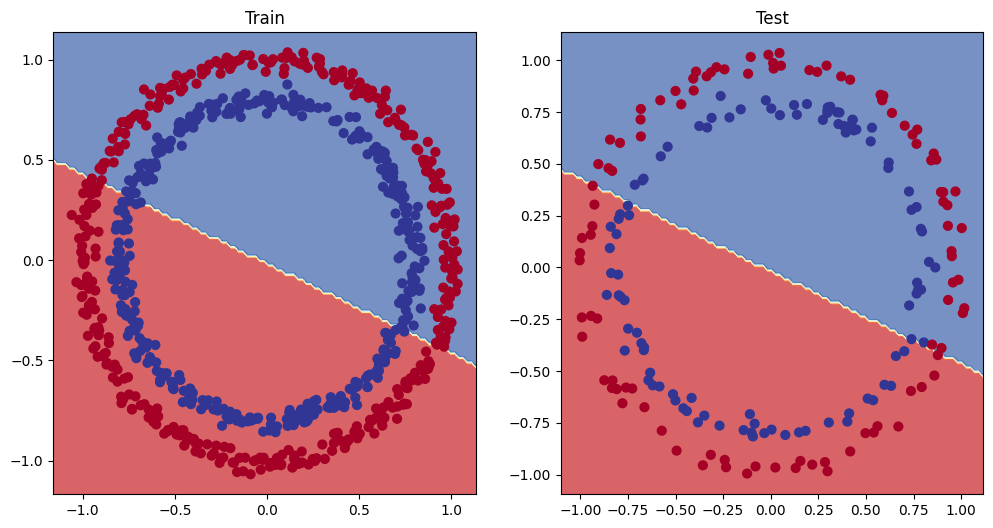

In [394]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Improving our model through experimentation

Can be done by:

- Add more layers
- Add more hidden units
- Fit for longer (epochs)
- Changing the activation function
- Changing the learning rate
- Changing the loss function


### In our case the missing piece is non-linearity


Epoch: 0 | Loss: 0.69218, Acc: 50.38% | Test loss: 0.69575, Test acc: 51.00%
Epoch: 100 | Loss: 0.67659, Acc: 62.12% | Test loss: 0.68219, Test acc: 56.50%
Epoch: 200 | Loss: 0.65045, Acc: 83.50% | Test loss: 0.65837, Test acc: 79.50%
Epoch: 300 | Loss: 0.58797, Acc: 98.50% | Test loss: 0.60248, Test acc: 96.00%
Epoch: 400 | Loss: 0.44759, Acc: 99.88% | Test loss: 0.47462, Test acc: 99.00%
Epoch: 500 | Loss: 0.25716, Acc: 99.88% | Test loss: 0.29369, Test acc: 99.50%
Epoch: 600 | Loss: 0.14120, Acc: 100.00% | Test loss: 0.17731, Test acc: 100.00%
Epoch: 700 | Loss: 0.08124, Acc: 100.00% | Test loss: 0.11210, Test acc: 100.00%
Epoch: 800 | Loss: 0.05323, Acc: 100.00% | Test loss: 0.08000, Test acc: 100.00%
Epoch: 900 | Loss: 0.03826, Acc: 100.00% | Test loss: 0.06200, Test acc: 100.00%


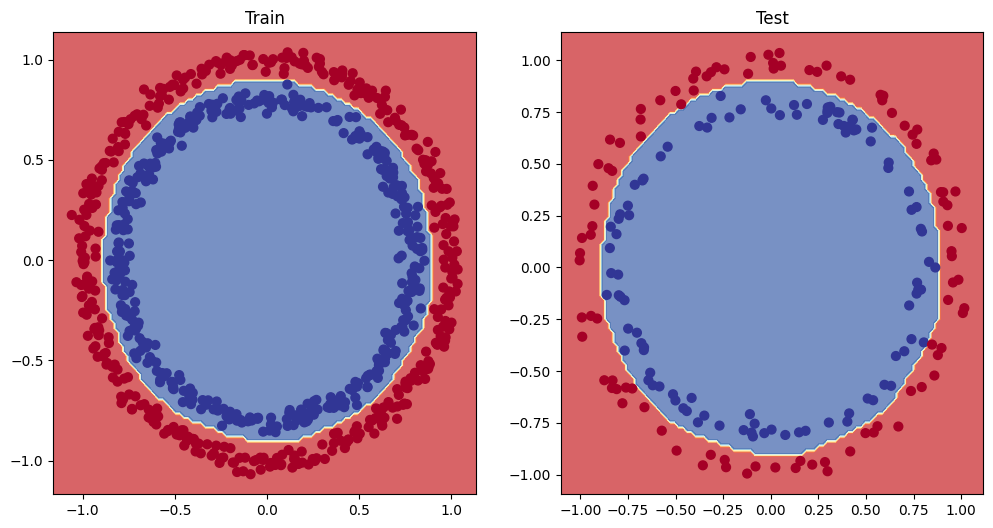

In [395]:
# Build a model with non-linear activation function
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_0 = nn.Linear(in_features=2, out_features=100)
        self.layer_1 = nn.Linear(in_features=100, out_features=100)
        self.layer_2 = nn.Linear(in_features=100, out_features=1)
        self.relu = nn.ReLU() # our non-linear activation function

    def forward(self, x):
        return self.layer_2(self.relu(self.layer_1(self.relu(self.layer_0(x))))) 

# Instantiate an instance
model_2 = CircleModelV1().to(device)

# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

# Training and testing
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### training
    model_2.train()

    # Forward pass
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # Calculate loss and accuracy
    loss = loss_fn(y_logits,
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Back propagation
    loss.backward()

    # Step the optimizer
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        
        # Forward pass
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

# 4. Replicating non-linear activation functions


In [396]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A, A.shape, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.Size([20]),
 torch.float32)

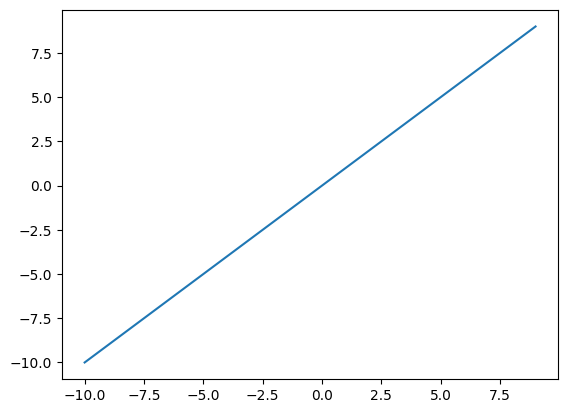

In [397]:
# Visualize the tensor
plt.plot(A, A)

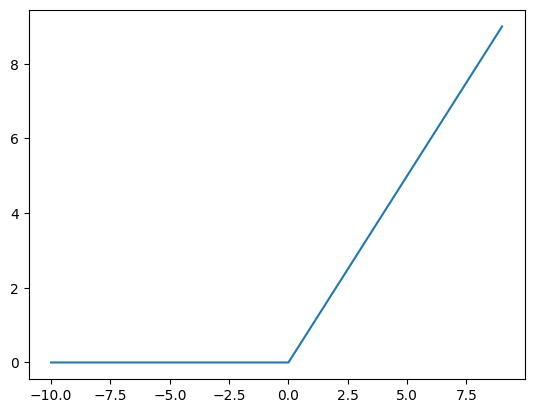

In [398]:
# Visualize Rectified Linear Unit
plt.plot(A, torch.relu(A))

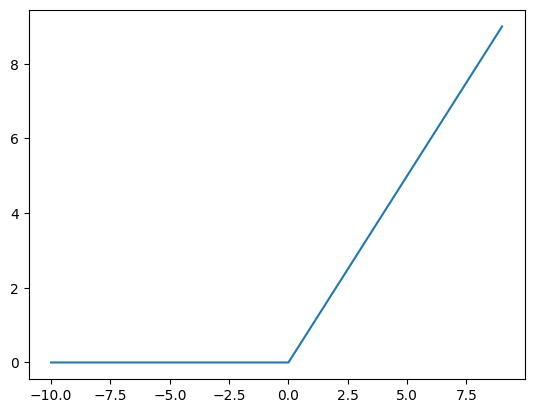

In [399]:
# Replicating Rectified Linear Unit
def relu_R(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

plt.plot(A, relu_R(A))

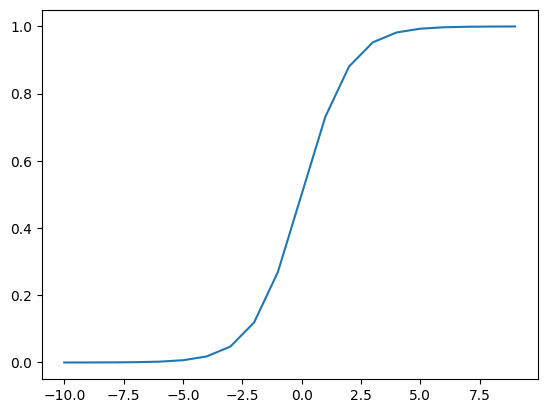

In [400]:
# Replicating Sigmoid curve
def sigmoid_R(x: torch.Tensor) -> torch.Tensor:
    return 1 / (1 + torch.exp(-x))

plt.plot(A, sigmoid_R(A))

# Multi-Class Classification Problem


# 1. Creating toy multi-class data


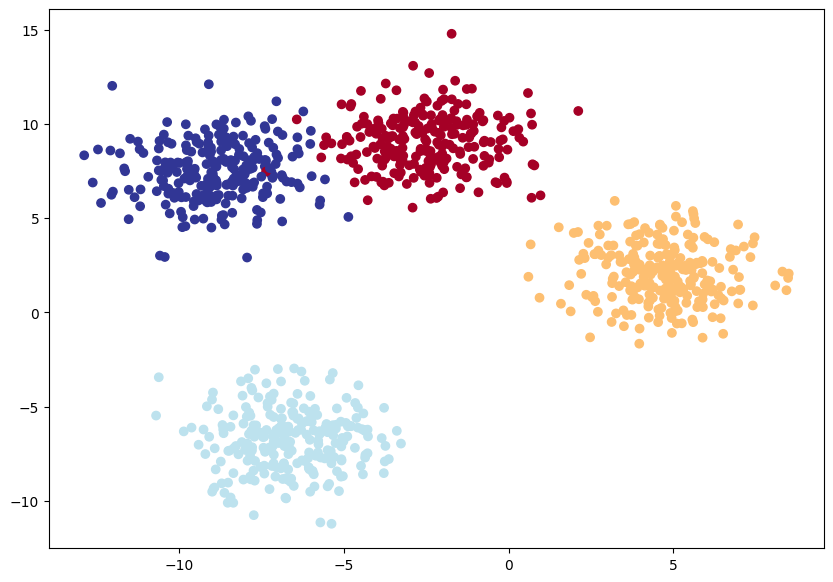

In [401]:
# import the dependencies
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set hyperparameters for data creation
NUM_CLASSES =4
NUM_SAMPLES = 1000
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=NUM_SAMPLES,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# Turn data in tensors, LongTensor because we'll use cross entropy
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Split data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0],
            X_blob[:, 1],
            c=y_blob, cmap=plt.cm.RdYlBu)

# 2. Building a Model


In [402]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [403]:
# Build a multi-class classification model


In [404]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-class classification model.

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output classes
            hidden_units (int): Number of hidden units between layers, default 8

        Returns:

        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_3 = BlobModel(input_features=2,
                    output_features=4).to(device)

model_3

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [405]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### Getting prediction probablities

Convert model's outputs to prediction labels

logits (raw output of the model) -> pred probs (use`torch.softmax`) -> pred labels using softmax activation function(take the argmax of the prediction probabilities)


In [406]:
# View the raw outputs
model_3.eval()
with torch.inference_mode():
    y_logits = model_3(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [407]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [408]:
# Convert our model's logit output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [409]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [410]:
torch.argmax(y_pred_probs[0]) # to check the index that our model thinks is the right class

tensor(1, device='cuda:0')

In [411]:
torch.argmax(y_pred_probs[1])

tensor(0, device='cuda:0')

In [412]:
# Convert our model's pred probs to pred labels
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [413]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

## Training loop and Testing loop


In [414]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_3.train()

    y_logits = model_3(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                      y_pred=test_preds)
    
    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}")
        


Epoch: 0 | Loss: 1.1588, Acc: 40.38 | Test loss: 1.0755, Test acc: 48.00
Epoch: 10 | Loss: 0.6448, Acc: 96.75 | Test loss: 0.6607, Test acc: 97.50
Epoch: 20 | Loss: 0.4254, Acc: 98.50 | Test loss: 0.4307, Test acc: 100.00
Epoch: 30 | Loss: 0.2529, Acc: 99.12 | Test loss: 0.2451, Test acc: 99.50
Epoch: 40 | Loss: 0.1123, Acc: 99.25 | Test loss: 0.1023, Test acc: 99.50
Epoch: 50 | Loss: 0.0663, Acc: 99.25 | Test loss: 0.0585, Test acc: 99.50
Epoch: 60 | Loss: 0.0507, Acc: 99.25 | Test loss: 0.0429, Test acc: 99.50


Epoch: 70 | Loss: 0.0430, Acc: 99.25 | Test loss: 0.0349, Test acc: 99.50
Epoch: 80 | Loss: 0.0384, Acc: 99.25 | Test loss: 0.0299, Test acc: 99.50
Epoch: 90 | Loss: 0.0352, Acc: 99.25 | Test loss: 0.0266, Test acc: 99.50


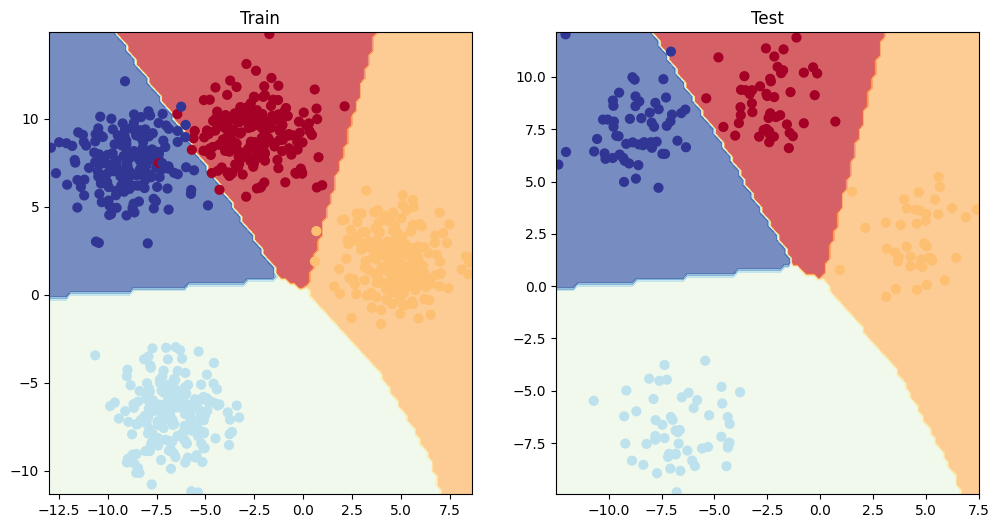

In [415]:
# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)

## Ways to evaluate our model further

- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix
- Classsification report

Use torchmetrics


In [420]:
from torchmetrics import Accuracy

# Setup metric
torchmetrics_accuracy = Accuracy(task="multiclass",
                                 num_classes=NUM_CLASSES).to(device)

# Calculate Accuracy
torchmetrics_accuracy(test_preds, y_blob_test)

tensor(0.9950, device='cuda:0')